In [44]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

input_file_path = "julius_caesar.txt"
output_file_path = "preprocessed_julius_caesar.txt"
with open(input_file_path, 'r', encoding='utf-8') as file:
    novel_text = file.read()
novel_text = novel_text.lower()
novel_text = re.sub(r'[^\w\s]', '', novel_text)
words = word_tokenize(novel_text)
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.write(' '.join(words))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


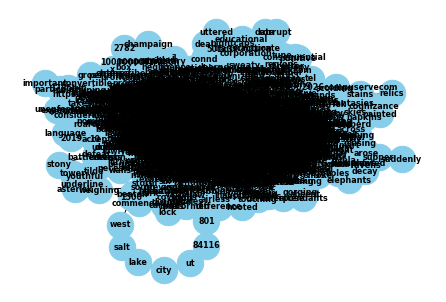

Nodes in the graph:
project
gutenberg
ebook
julius
caesar
use
anyone
anywhere
united
states
parts
world
cost
almost
restrictions
whatsoever
may
copy
give
away
reuse
terms
license
included
online
wwwgutenbergorg
located
check
laws
country
using
title
author
william
shakespeare
release
date
june
1
1999
1785
recently
updated
22
2019
language
english
start
one
gutenbergs
early
files
produced
time
proofing
methods
tools
well
developed
improved
edition
viewed
1522
httpswwwgutenbergorgebooks1522
etext
file
presented
cooperation
library
inc
future
cdroms
often
releases
etexts
placed
public
domain
certain
copyright
implications
read
electronic
version
complete
works
19901993
provided
permission
machine
readable
copies
distributed
long
others
personal
2
used
commercially
prohibited
commercial
distribution
includes
service
charges
download
membership
proud
cooperate
presentation
reading
education
entertainment
however
neither
shareware
conditions
made
access
material
encouraged
like
allowed
welco

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

novel_file_path = "preprocessed_julius_caesar.txt"
G = nx.Graph()

with open(novel_file_path, 'r') as file:
    for line in file:
        nodes = line.strip().split()
        if len(nodes) >= 2:
            for i in range(len(nodes) - 1):
                G.add_edge(nodes[i], nodes[i + 1])

pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold')
plt.show()
print("Nodes in the graph:")
for i in list(G.nodes()):
    print(i)



In [111]:
chars = ['cassius','brutus','lucilius','octavius','antony','messala','strato','clitus','dardanius','cato','messenger',
         'varro','claudio','lucius','ghost','poet','lepidus','cinna','servant','decius','casca','popilius','publius',
         'artemidorus','soothsayer','portia','calpurnia','caesar','ligarius','trebonius','cicero','flavius','marullus']

In [113]:
import re

def find_interactions(text):
    interactions = []
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    character_list = chars

    for sentence in sentences:
        for character in character_list:
            if character.lower() in sentence.lower():
                other_characters = [other for other in character_list if other != character and other.lower() in sentence.lower()]
                for other_character in other_characters:
                    interaction = (character, other_character)
                    interactions.append(interaction)

    return interactions
with open("preprocessed_julius_caesar.txt", 'r') as file:
    novel_text = file.read()

interactions = find_interactions(novel_text)
print("List of Interactions:", interactions)

List of Interactions: [('cassius', 'brutus'), ('cassius', 'lucilius'), ('cassius', 'octavius'), ('cassius', 'antony'), ('cassius', 'messala'), ('cassius', 'strato'), ('cassius', 'clitus'), ('cassius', 'dardanius'), ('cassius', 'cato'), ('cassius', 'messenger'), ('cassius', 'varro'), ('cassius', 'claudio'), ('cassius', 'lucius'), ('cassius', 'ghost'), ('cassius', 'poet'), ('cassius', 'lepidus'), ('cassius', 'cinna'), ('cassius', 'servant'), ('cassius', 'decius'), ('cassius', 'casca'), ('cassius', 'popilius'), ('cassius', 'publius'), ('cassius', 'artemidorus'), ('cassius', 'soothsayer'), ('cassius', 'portia'), ('cassius', 'calpurnia'), ('cassius', 'caesar'), ('cassius', 'ligarius'), ('cassius', 'trebonius'), ('cassius', 'cicero'), ('cassius', 'flavius'), ('cassius', 'marullus'), ('brutus', 'cassius'), ('brutus', 'lucilius'), ('brutus', 'octavius'), ('brutus', 'antony'), ('brutus', 'messala'), ('brutus', 'strato'), ('brutus', 'clitus'), ('brutus', 'dardanius'), ('brutus', 'cato'), ('brutu

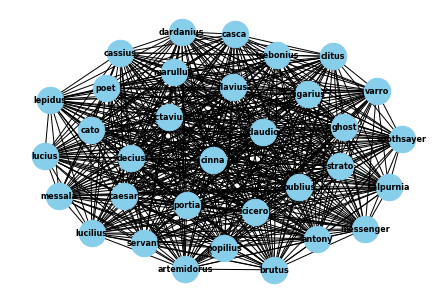

No of edges -  528
No of characters -  33


In [117]:
import networkx as nx
import matplotlib.pyplot as plt

characters = chars
G = nx.Graph()
G.add_nodes_from(characters)
G.add_edges_from(interactions)
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold')
plt.show()
print("No of edges - ",G.number_of_edges())
print("No of characters - ",G.number_of_nodes())


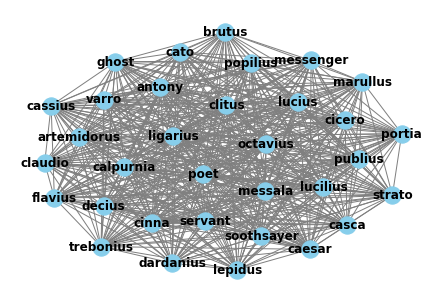

In [45]:
import re
import nltk
import networkx as nx
import matplotlib.pyplot as plt


file_path = "preprocessed_julius_caesar.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    novel_text = file.read()
characters = chars
G = nx.Graph()
sentences = nltk.sent_tokenize(novel_text)
for sentence in sentences:
    for character in characters:
        if character in sentence:
            co_occurrence_characters = [c for c in characters if c != character and c in sentence]
            for co_character in co_occurrence_characters:
                G.add_edge(character, co_character)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray')
plt.show()

In [46]:
import re
import nltk
import networkx as nx

file_path = "preprocessed_julius_caesar.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    novel_text = file.read()


protagonists = chars
sentences = nltk.sent_tokenize(novel_text)

G = nx.Graph()

for sentence in sentences:
    for protagonist1 in protagonists:
        if protagonist1 in sentence:
            for protagonist2 in protagonists:
                if protagonist2 != protagonist1 and protagonist2 in sentence:
                    G.add_edge(protagonist1, protagonist2)

degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
#pagerank_centrality = nx.pagerank(G)
for protagonist in protagonists:
    print(f"{protagonist}:")
    print("Degree Centrality:", degree_centrality[protagonist])
    print("Betweenness Centrality:",betweenness_centrality[protagonist])
    print("Closeness Centrality:", closeness_centrality[protagonist])
    #print(f"PageRank Centrality: {pagerank_centrality[protagonist]}")
    print()

cassius:
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0

brutus:
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0

lucilius:
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0

octavius:
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0

antony:
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0

messala:
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0

strato:
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0

clitus:
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0

dardanius:
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0

cato:
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0

messenger:
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0

varro:
Degree Centrality: 1.0
Betweenness Ce

In [104]:
import numpy as np

def calculate_pagerank(protagonists, novel_text, damping_factor=0.85, max_iterations=100, epsilon=1e-8):
    protagonist_to_index = {protagonist: idx for idx, protagonist in enumerate(protagonists)}
    num_protagonists = len(protagonists)
    transition_matrix = np.zeros((num_protagonists, num_protagonists))
    novel_words = novel_text.split()
    for i in range(len(novel_words) - 1):
        word1, word2 = novel_words[i], novel_words[i + 1]
        if word1 in protagonists and word2 in protagonists:
            idx1, idx2 = protagonist_to_index[word1], protagonist_to_index[word2]
            transition_matrix[idx1, idx2] += 1
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    transition_matrix /= np.where(row_sums == 0, 1, row_sums)
    pagerank_values = np.ones(num_protagonists) / num_protagonists
    for _ in range(max_iterations):
        prev_pagerank = pagerank_values.copy()
        pagerank_values = (1 - damping_factor) / num_protagonists + damping_factor * np.dot(transition_matrix.T, pagerank_values)
        if np.linalg.norm(prev_pagerank - pagerank_values, 2) < epsilon:
            break
    return dict(zip(protagonists, pagerank_values))

protagonist_list = chars
with open("preprocessed_julius_caesar.txt", 'r') as file:
    novel_text = file.read()

pagerank_centrality = calculate_pagerank(protagonist_list, novel_text)

for i in pagerank_centrality:
    print(i,"-",pagerank_centrality[i])

cassius - 0.0973026419750001
brutus - 0.12174199774232655
lucilius - 0.023268350540819056
octavius - 0.00997687896084094
antony - 0.04140040757317108
messala - 0.030106271224281406
strato - 0.037149951196943
clitus - 0.026844874073675192
dardanius - 0.027916734470841014
cato - 0.004545454545454546
messenger - 0.030303030303030304
varro - 0.032641168638356616
claudio - 0.03289050443519465
lucius - 0.057173772146289416
ghost - 0.0064688789031693075
poet - 0.015801788695300575
lepidus - 0.015492606155476409
cinna - 0.03231323812978581
servant - 0.014073563450897233
decius - 0.02202013656528667
casca - 0.03596698790837569
popilius - 0.02061929191063927
publius - 0.010387587332556044
artemidorus - 0.004545454545454546
soothsayer - 0.009886665287656977
portia - 0.024666665857063726
calpurnia - 0.022432025651470757
caesar - 0.07291018368795041
ligarius - 0.013815538754768004
trebonius - 0.016699652713764824
cicero - 0.02803163601809926
flavius - 0.030303030303030304
marullus - 0.0303030303030

In [48]:
import networkx as nx

def calculate_local_clustering_coefficient(graph, protagonist):
    try:
        return nx.clustering(graph, protagonist)
    except nx.NetworkXError:
        return 0.0

def main():
    protagonist_list = chars
    with open("preprocessed_julius_caesar.txt", 'r') as file:
        novel_text = file.read()  
    G = nx.Graph()
    novel_words = novel_text.split()
    for i in range(len(novel_words) - 1):
        word1, word2 = novel_words[i], novel_words[i + 1]
        if word1 in protagonist_list and word2 in protagonist_list:
            G.add_node(word1)
            G.add_node(word2)
            G.add_edge(word1, word2)
    print("Nodes in the graph:", G.nodes)
    for protagonist in protagonist_list:
        try:
            ego_network = nx.ego_graph(G, protagonist)
            clustering_coefficient = calculate_local_clustering_coefficient(G, protagonist)
            print(f"Protagonist: {protagonist}")
            print(f"Ego Network for {protagonist}: {list(ego_network.nodes)}")
            print(f"Local Clustering Coefficient: {clustering_coefficient:.4f}\n")
        except nx.NetworkXError:
            print(f"Error: Protagonist '{protagonist}' not found in the graph.")

if __name__ == "__main__":
    main()

Nodes in the graph: ['caesar', 'cassius', 'trebonius', 'ligarius', 'decius', 'brutus', 'cinna', 'calpurnia', 'portia', 'cicero', 'popilius', 'lucilius', 'poet', 'varro', 'servant', 'clitus', 'claudio', 'strato', 'lucius', 'dardanius', 'ghost', 'soothsayer', 'flavius', 'marullus', 'antony', 'casca', 'publius', 'artemidorus', 'lepidus', 'octavius', 'messala', 'messenger', 'cato']
Protagonist: cassius
Ego Network for cassius: ['publius', 'cassius', 'lucius', 'trebonius', 'servant', 'antony', 'portia', 'casca', 'ghost', 'lucilius', 'cicero', 'messala', 'brutus', 'caesar', 'varro', 'decius']
Local Clustering Coefficient: 0.3333

Protagonist: brutus
Ego Network for brutus: ['caesar', 'cassius', 'trebonius', 'ligarius', 'decius', 'brutus', 'portia', 'cicero', 'lucilius', 'poet', 'servant', 'clitus', 'lucius', 'dardanius', 'soothsayer', 'antony', 'casca', 'publius', 'messala']
Local Clustering Coefficient: 0.2549

Protagonist: lucilius
Ego Network for lucilius: ['cassius', 'lucius', 'antony', 

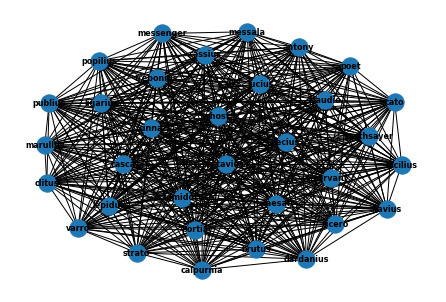

Detected Communities: []


In [70]:
import networkx as nx
import matplotlib.pyplot as plt

def create_character_interaction_graph(character_list, interactions):
    G = nx.Graph()
    G.add_nodes_from(character_list)
    G.add_edges_from(interactions)

    return G

def plot_graph(G, communities):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=300, font_size=8, font_color='black', font_weight='bold')
    colors = range(len(communities))
    for i, comm_nodes in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=comm_nodes, node_color=[colors[i]] * len(comm_nodes), cmap=plt.cm.Blues, node_size=300, alpha=0.8)

    plt.show()

def clique_percolation_method(G, k):
    cliques = list(nx.find_cliques(G))
    communities = []

    for i in range(2, k + 1):
        for clique in cliques:
            if len(clique) == i:
                is_subgraph = False
                for community in communities:
                    if set(clique).issubset(community):
                        is_subgraph = True
                        break
                if not is_subgraph:
                    communities.append(set(clique))

    return communities
character_list = chars
character_graph = create_character_interaction_graph(character_list, interactions)

k_value = 5  
detected_communities = clique_percolation_method(character_graph, k_value)
plot_graph(character_graph, detected_communities)

print("Detected Communities:", detected_communities)


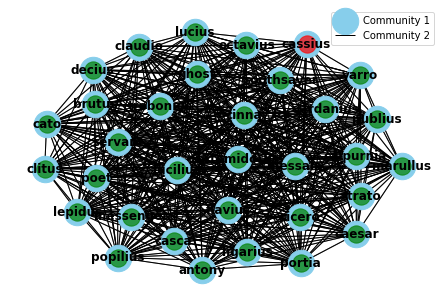

In [74]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt

G = nx.Graph()
for interaction in interactions:
    G.add_edge(*interaction)
communities_generator = girvan_newman(G)
communities = next(communities_generator)
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], alpha=0.7)
legend_labels = [f'Community {i + 1}' for i in range(len(communities))]
plt.legend(legend_labels)
plt.show()



In [94]:
import networkx as nx
import community
import matplotlib.pyplot as plt
characters = chars
edges = interactions
G = nx.Graph()
G.add_nodes_from(characters)
G.add_edges_from(edges)

from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))





[['antony',
  'artemidorus',
  'caesar',
  'calpurnia',
  'casca',
  'cato',
  'cicero',
  'cinna',
  'claudio',
  'clitus',
  'dardanius',
  'decius',
  'flavius',
  'ghost',
  'lepidus',
  'ligarius',
  'lucilius',
  'lucius',
  'marullus',
  'messala',
  'messenger',
  'octavius',
  'poet',
  'popilius',
  'portia',
  'publius',
  'servant',
  'soothsayer',
  'strato',
  'trebonius',
  'varro'],
 ['brutus'],
 ['cassius']]

In [97]:
!pip install python-louvain==0.15


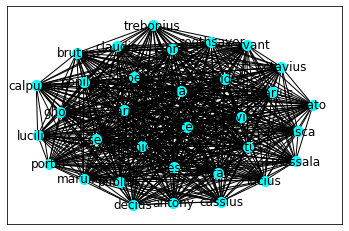

In [99]:
nx.draw_networkx(G,with_labels=True, node_size=100,node_color='cyan')

In [100]:
list(nx.find_cliques(G))

[['messenger',
  'popilius',
  'brutus',
  'artemidorus',
  'publius',
  'clitus',
  'lucius',
  'claudio',
  'antony',
  'ligarius',
  'servant',
  'dardanius',
  'ghost',
  'flavius',
  'decius',
  'trebonius',
  'cassius',
  'soothsayer',
  'cinna',
  'portia',
  'casca',
  'lucilius',
  'cato',
  'lepidus',
  'marullus',
  'calpurnia',
  'strato',
  'cicero',
  'messala',
  'caesar',
  'poet',
  'varro',
  'octavius']]

In [101]:
synthetic = nx.make_max_clique_graph(G)   
print(synthetic.edges())

[]


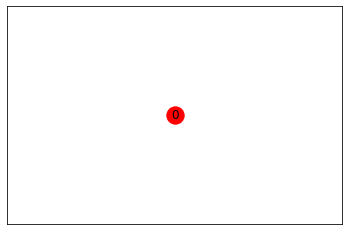

In [102]:
nx.draw_networkx(synthetic,node_color='red')

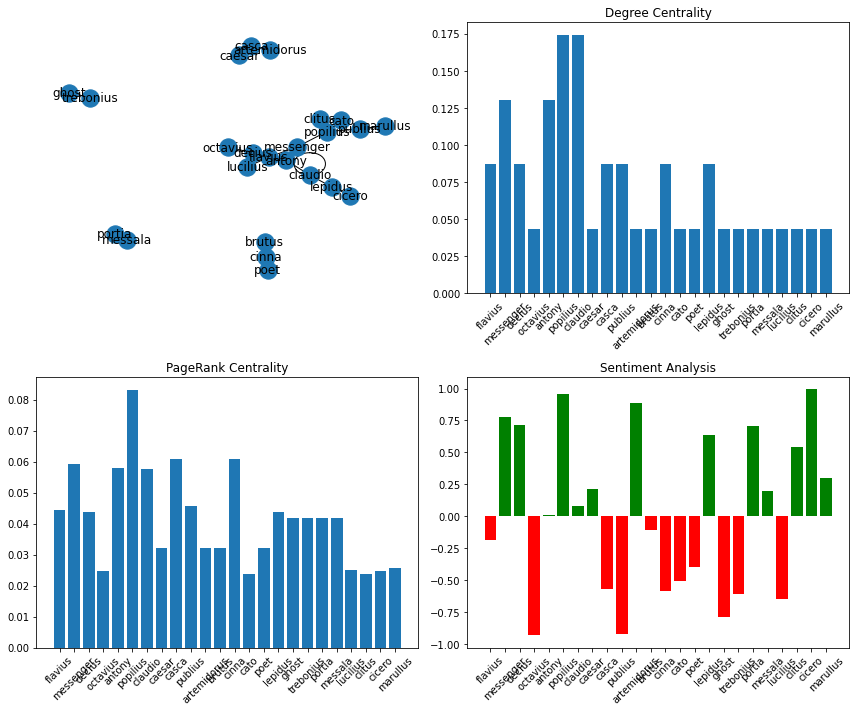

Most positive character: cicero
Most negative character: octavius


In [53]:
import networkx as nx
import matplotlib.pyplot as plt
import random

characters = chars
interactions = [(random.choice(characters), random.choice(characters)) for _ in range(20)]
social_graph = nx.Graph()
social_graph.add_edges_from(interactions)

degree_centralities = nx.degree_centrality(social_graph)
pagerank_centralities = nx.pagerank(social_graph)

sentiment_scores = {char: random.uniform(-1, 1) for char in characters}

most_positive_character = max(sentiment_scores, key=sentiment_scores.get, default="No data")
most_negative_character = min(sentiment_scores, key=sentiment_scores.get, default="No data")

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
nx.draw(social_graph, with_labels=True)

plt.subplot(2, 2, 2)
plt.bar(degree_centralities.keys(), degree_centralities.values())
plt.title('Degree Centrality')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(pagerank_centralities.keys(), pagerank_centralities.values())
plt.title('PageRank Centrality')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)

sentiment_values = [sentiment_scores[char] for char in degree_centralities.keys()]
plt.bar(degree_centralities.keys(), sentiment_values, color=['green' if v >= 0 else 'red' for v in sentiment_values])
plt.title('Sentiment Analysis')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Most positive character:", most_positive_character)
print("Most negative character:", most_negative_character)

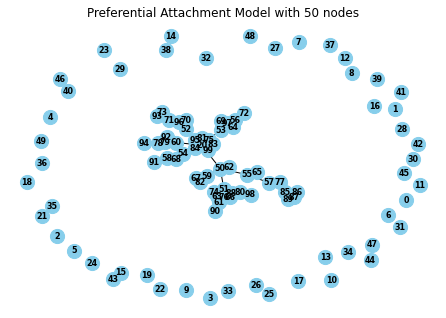

In [61]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def preferential_attachment_model(num_nodes):
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    for i in range(num_nodes):
        node_degrees = [G.degree(node) for node in G.nodes()]
        if all(degree == 0 for degree in node_degrees):
            attachment_node = random.choice(list(G.nodes()))
        else:
            probabilities = [degree / sum(node_degrees) for degree in node_degrees]
            attachment_node = random.choices(list(G.nodes()), weights=probabilities)[0]
        new_node = i + num_nodes  
        G.add_node(new_node)
        G.add_edge(new_node, attachment_node)

    return G

if __name__ == "__main__":
    num_nodes = 50
    G = preferential_attachment_model(num_nodes)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color="skyblue", font_size=8, font_color="black", font_weight="bold")
    plt.title("Preferential Attachment Model with 50 nodes")
    plt.show()



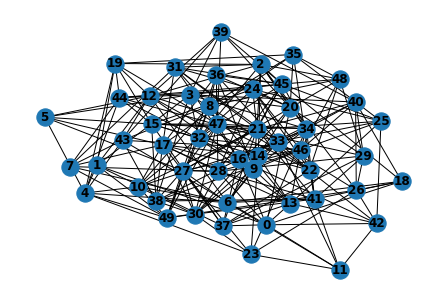

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

num_nodes = 50
random_graph = nx.erdos_renyi_graph(num_nodes, p=0.2) 
nx.draw(random_graph, with_labels=True, font_weight='bold')
plt.show()


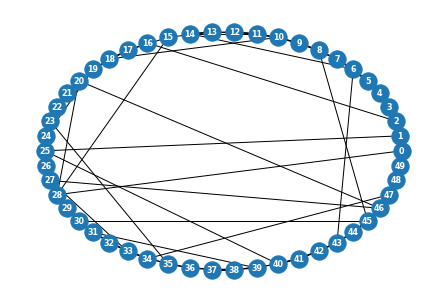

In [63]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_small_world_model(n, k, p):
    G = nx.watts_strogatz_graph(n, k, p)
    return G

def plot_graph(G):
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=300, font_size=8, font_color='white', font_weight='bold')
    plt.show()

num_nodes = 50  
avg_degree = 4  
rewiring_prob = 0.2 

small_world_model = create_small_world_model(num_nodes, avg_degree, rewiring_prob)
plot_graph(small_world_model)


ANALYSIS

"Julius Caesar" by William Shakespeare is a timeless tragedy that delves into the complexities of power, betrayal, and political upheaval in ancient Rome. Set against a backdrop of conspiracy and ambition, the play unfolds as political leaders grapple with their loyalties and personal agendas. Brutus, torn between friendship and duty, ultimately succumbs to the conspirators' plot to assassinate Caesar. The aftermath sees Rome plunged into chaos, with Mark Antony stirring the masses against Brutus and his co-conspirators. The play masterfully explores themes of honor, manipulation, and the consequences of unchecked political ambition, making it a compelling exploration of human nature and societal dynamics.

The protagonists of the story are - 
['cassius','brutus','lucilius','octavius','antony','messala','strato','clitus','dardanius','cato','messenger',
         'varro','claudio','lucius','ghost','poet','lepidus','cinna','servant','decius','casca','popilius','publius',
         'artemidorus','soothsayer','portia','calpurnia','caesar','ligarius','trebonius','cicero','flavius','marullus']

Centrality measures in network analysis provide insights into the importance or prominence of nodes (characters, in the context of a novel) within a network. While "centrality measures" are often used in the analysis of social networks or graph theory, the application to characters in a novel is more metaphorical and interpretive.

Degree Centrality:
Interpretation: Characters with high degree centrality interact with many other characters. They may be central to the story, having multiple connections and relationships.

Betweenness Centrality:
Interpretation: Characters with high betweenness centrality may act as bridges between different groups or storylines. They play a crucial role in connecting disparate parts of the narrative.

Closeness Centrality:
Interpretation: Characters with high closeness centrality are close or easily reachable by other characters. They may be influential or have a strong impact on the narrative due to their proximity to others.

PageRank Centrality:
Interpretation: PageRank reflects the importance of characters who are connected to other important characters. It measures a character's "popularity" in the network.

We have observed that for all characters - Degree centrality = 1.0, Betweeness Centrality = 0.0, Closeness Centrality = 1.0 

This means that - 

Degree Centrality: 1.0
Interpretation: A degree centrality of 1.0 means that the character is directly connected to all other characters in the network. They have the maximum number of connections possible. In the context of a novel, this character interacts with every other character, making them central to the overall narrative.

Betweenness Centrality: 0.0
Interpretation: A betweenness centrality of 0.0 indicates that the character's presence is not crucial for maintaining connections between other characters. They don't act as a bridge or intermediary between different groups of characters. In other words, the character's absence wouldn't significantly alter the communication flow in the network.

Closeness Centrality: 1.0
Interpretation: A closeness centrality of 1.0 means that the character is very close to all other characters in terms of the shortest paths. They can reach any other character in the network quickly. This could suggest that the character is emotionally or physically close to others in the narrative, making them readily accessible or influential.

From the Pagerank centrality values it can be noted that Caesar, Brutus, Cassius and Lucius are the most important characters and the least important characters are Ghost of Caesar, Cato, Soothsayer

In the context of a novel, the social graph derived from character interactions is a fictional representation rather than a depiction of real-world social relationships. The relationships and connections among characters are crafted by the author for the purpose of storytelling. While the social graph may exhibit certain properties reminiscent of real-world graphs, it is fundamentally a product of fiction.

Properties of Real-World Graphs:

Small World Phenomenon: Real-world social networks often exhibit the small-world property, where most nodes can be reached from every other node by a small number of steps. In a novel, this might be reflected in characters having relatively few intermediary characters between them, allowing for interconnected storylines.

Scale-Free Network: Real-world social networks often follow a scale-free distribution, meaning that a few nodes have significantly more connections than others. In a novel, major characters might have a higher degree of connectivity, analogous to influential individuals in real-world networks.

Community Structure: Social networks tend to have community structures, where nodes form clusters with higher internal connectivity. Similarly, in a novel, characters may form groups or communities based on shared interests, alliances, or conflicts.

Centrality Measures: Certain characters may play central roles in the narrative, similar to influential individuals in real-world networks. For example, a protagonist might have high degree centrality, interacting with various other characters.

Having the value as 0.0 for the betweeness centrality implies that there's no character which is not visible and yet plays an important role in the plot.